In [1]:
from dataset import SequenceDataset
from model import LSTM
from main import *
from torch.utils.data import DataLoader
from utils import *
import pandas as pd
import torch
import numpy as np
import random

In [2]:
import xgboost as xgb

In [3]:
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

In [4]:
df = pd.read_csv(r'F:\ML_Bootcamp\LTSF-Linear\dataset\test.csv')
df = preprocess_data(df)
target = 'Close'
features = list(df.columns)
train_size = int(len(df)*.8)
train_df = df[:train_size]
test_df = df[train_size:]
#scaled_train_df, scalers = scale_df(train_df)
#scaled_test_df = apply_scalers(test_df, scalers)

In [5]:
X_train, y_train = supervised_from_dataframe(train_df, target, features, sequence_length=7)
X_test, y_test = supervised_from_dataframe(test_df, target, features, sequence_length=7)

In [6]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01)

In [7]:
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [8]:
preds = model.predict(X_test)

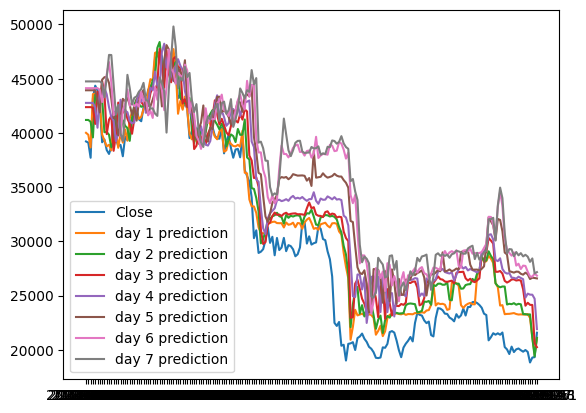

In [9]:
plot_test(test_df, torch.Tensor(preds))